# Dataset Generation

##Libraries

In [ ]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import shelve
import math
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import random as rd
from torch.utils.data import Dataset, DataLoader

##Training Image Demo

In [ ]:
Trainer_image = np.zeros((100,100))
Trainer_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Image Generation Vanilla Code

## Find number of squares and assign each an index

In [ ]:
amt = rd.randrange(1,12) #1 to 11 possible total number of squares, becuase randrange does not include end parameter
idx = []
for num in range(1,amt+1):
  idx.append(num) #make a list and index the squares
print(amt)
print(idx)
    

6
[1, 2, 3, 4, 5, 6]


## Generates Coordinates and Size

In [ ]:
coo_x = []
coo_y = []
sqr_size = []
pix_remain = [[],[]]
for i in range(0,100):
  pix_remain[0].append(i)
  pix_remain[1].append(i) #makes artificial pic for overlap test
while len(coo_x) < amt: #below is the border, overlap test, and coord generation
  x_hold = rd.randrange(0,100)
  y_hold = rd.randrange(0,100)
  size_hold = rd.randrange(1,5)
  x_ends = [x_hold,x_hold + size_hold - 1]
  y_ends = [y_hold,y_hold + size_hold - 1]
  if size_hold + x_hold <= 99 and size_hold + y_hold <= 99 and True == all(item in pix_remain[0] for item in x_ends) and True == all(item in pix_remain[1] for item in y_ends):
    coo_x.append(x_hold)
    coo_y.append(y_hold)
    sqr_size.append(size_hold)
    del pix_remain[0][x_ends[0]:x_ends[1]]
    del pix_remain[1][y_ends[0]:y_ends[1]]
  else:
    continue


print(coo_x)
print(coo_y)
print(sqr_size)

[75, 23, 69, 46, 85, 60]
[51, 17, 8, 56, 32, 10]
[1, 1, 1, 2, 2, 2]


## Replace 0s in Array to Generate Images!

In [ ]:
Trainer_image = np.zeros((100,100))
idx.insert(0,0)
del idx[-1]
print(idx)
for i in idx:
  Trainer_image[coo_x[i]:coo_x[i]+sqr_size[i],coo_y[i]:coo_y[i]+sqr_size[i]] = 1
Trainer_image

[0, 1, 2, 3, 4, 5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
np.set_printoptions(threshold=1000) #return output truncation to default

# Full Code in Functions

[93, 10, 47, 52, 7, 46, 4, 21, 81, 85, 64, 26, 10, 21, 40, 65]
[30, 15, 53, 17, 71, 55, 92, 97, 1, 82, 40, 50, 27, 97, 83, 72]
[1, 1, 3, 4, 3, 1, 2, 1, 2, 4, 3, 1, 2, 1, 4, 2]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


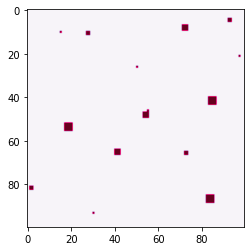

In [ ]:
np.set_printoptions(threshold=1000) #print full array

def squares():
  amt = rd.randrange(6,17) #6 to 16 possible total number of squares, becuase randrange does not include end parameter
  idx = []
  for num in range(1,amt+1):
    idx.append(num) #make a list and index the squares
  return amt,idx
  

def coo(amt,idx):
  coo_x = []
  coo_y = []
  sqr_size = []
  pix_remain = [[],[]]
  for i in range(0,100):
    pix_remain[0].append(i)
    pix_remain[1].append(i) #makes artificial image for overlap test
  while len(coo_x) < amt: #below is the border, overlap test, and coord generation
    x_hold = rd.randrange(0,100)
    y_hold = rd.randrange(0,100) #temporary x & y coordinates
    size_hold = rd.randrange(1,5) #temp. size (regulates max size to be 4x4)
    x_ends = [x_hold,x_hold + size_hold - 1] 
    y_ends = [y_hold,y_hold + size_hold - 1] #store upper & lower extreme of square into lists
    if size_hold + x_hold <= 99 and size_hold + y_hold <= 99 and True == all(item in pix_remain[0] for item in x_ends) and True == all(item in pix_remain[1] for item in y_ends):
      coo_x.append(x_hold)
      coo_y.append(y_hold)
      sqr_size.append(size_hold)
      del pix_remain[0][x_ends[0]:x_ends[1]] #check for border and overlap. If good, temp. coordinates and size are added to permanent coo & size list. This is two lists, a square bracket is a list
      del pix_remain[1][y_ends[0]:y_ends[1]] #"occupied" pixels are removed from the artificial image for the next round of test
    else:
      continue
  return coo_x, coo_y, sqr_size


def image(coo_x,coo_y,sqr_size,idx):
  Trainer_image = np.zeros((100,100)) #"empty" image
  idx.insert(0,0)
  del idx[-1] #add a 0 in the beginning and delete the last number of the idx list
  for i in idx:
    Trainer_image[coo_x[i]:coo_x[i]+sqr_size[i],coo_y[i]:coo_y[i]+sqr_size[i]] = 1 #replace 0s with 1s!!!
  return Trainer_image


def main():
  amt,idx = squares()
  x,y,s = coo(amt,idx)
  print(x)
  print(y)
  print(s)
  print(idx) #these were printed for sanity check
  trainer = image(x,y,s,idx)
  plt.imshow(trainer,cmap='PuRd')

main()

# Main2 for Lists of Sqr Amt and Generated Images

In [ ]:
np.set_printoptions(threshold=1000) #print full array

def squares():
  amt = rd.randrange(6,17) #6 to 16 possible total number of squares, becuase randrange does not include end parameter
  idx = []
  for num in range(1,amt+1):
    idx.append(num) #make a list and index the squares
  return amt,idx
  

def coo(amt,idx):
  coo_x = []
  coo_y = []
  sqr_size = []
  pix_remain = [[],[]]
  for i in range(0,100):
    pix_remain[0].append(i)
    pix_remain[1].append(i) #makes artificial image for overlap test
  while len(coo_x) < amt: #below is the border, overlap test, and coord generation
    x_hold = rd.randrange(0,100)
    y_hold = rd.randrange(0,100) #temporary x & y coordinates
    size_hold = rd.randrange(1,5) #temp. size (regulates max size to be 4x4)
    x_ends = [x_hold,x_hold + size_hold - 1] 
    y_ends = [y_hold,y_hold + size_hold - 1] #store upper & lower extreme of square into lists
    if size_hold + x_hold <= 99 and size_hold + y_hold <= 99 and True == all(item in pix_remain[0] for item in x_ends) and True == all(item in pix_remain[1] for item in y_ends):
      coo_x.append(x_hold)
      coo_y.append(y_hold)
      sqr_size.append(size_hold)
      del pix_remain[0][x_ends[0]:x_ends[1]] #check for border and overlap. If good, temp. coordinates and size are added to permanent coo & size list
      del pix_remain[1][y_ends[0]:y_ends[1]] #"occupied" pixels are removed from the artificial image for the next round of test
    else:
      continue
  return coo_x, coo_y, sqr_size


def generator(coo_x,coo_y,sqr_size,idx):
  Trainer_image = np.zeros((100,100)) #"empty" image
  idx.insert(0,0)
  del idx[-1] #add a 0 in the beginning and delete the last number of the idx list
  for i in idx:
    Trainer_image[coo_x[i]:coo_x[i]+sqr_size[i],coo_y[i]:coo_y[i]+sqr_size[i]] = 1 #replace 0s with 1s!!!
  return Trainer_image


def cleanup():
  amt,idx = squares()
  x,y,s = coo(amt,idx)
  imgs = generator(x,y,s,idx)
  return amt, imgs

def main2():
  label = []
  imageset = []
  for i in range(0,5000):
    amt, image = cleanup()
    label.append(amt)
    imageset.append(torch.from_numpy(image).float())
  return label, imageset

label,imageset = main2()

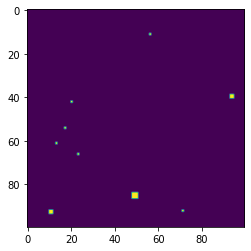

In [ ]:
plt.imshow(imageset[1])

# Building the Network

## Network Class

In [ ]:
class CounterNetwork(nn.Module):

  def __init__(self):
    super(CounterNetwork, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5)   # 1 input image channel, 6 output channels, 5x5 square convolution kernel
    self.conv2 = nn.Conv2d(6, 16, 5)  # 6 channels from the conv1 layer, 16 output channels, 5x5 square convolution kernel
    self.fc1 = nn.Linear(16*22*22, 120)  
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 11)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), 2) # 1) take x and apply convolution conv1; 2) apply nonlinearity F.relu; 3) apply max pool 2d
    x = F.max_pool2d(F.relu(self.conv2(x)), 2) # 1) take x and apply convolution conv2; 2) apply nonlinearity F.relu; 3) apply max pool 2d
    x = x.view(-1, self.num_flat_features(x))  # reshape from matrix to vector for fully connected layer
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):                # This is a function we added for convenience to find out the number of features in a layer.
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features


In [ ]:
net = CounterNetwork()
net.cuda()

CounterNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=11, bias=True)
)

## Dataset

In [ ]:
#Dataset

class SquaresDataset(Dataset):

  def __init__(self,label,imageset):
    self.label = label
    self.imageset = imageset

  def __len__(self):
    return len(self.label)

  def __getitem__(self,idx):
    label = self.label[idx]-6
    image = self.imageset[idx]
    sample = {'image':image.unsqueeze(0),'label':label}
    return sample

## Dataloader

In [ ]:
image_train = SquaresDataset(label,imageset)
imageloader = DataLoader(image_train,batch_size=32,shuffle=True,num_workers=1,pin_memory=True)

## Loss Function

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()                                 # specify the loss function
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)     # specify the optimizer

## Train the Network!

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
save_freq = 3
net.train()
loss_memory = []
for epoch in range(50):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(imageloader):
      labels = data['label']
      images = data['image']
      images, labels = images.cuda(), labels.cuda()
      optimizer.zero_grad()
      outputs = net(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.data.item()
    epoch_loss = running_loss / len(imageloader)
    print('[%d] loss: %.3f' %(epoch + 1, epoch_loss ))
    loss_memory.append(epoch_loss)
    running_loss = 0.0
    if epoch % save_freq == save_freq-1: 
       path =  F"/content/gdrive/MyDrive/%03d.ckpt" % epoch
       torch.save({
            'epoch': epoch,
            'model_state_dict': net.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            }, path)

[1] loss: 2.399
[2] loss: 2.397
[3] loss: 2.394
[4] loss: 2.382
[5] loss: 2.248
[6] loss: 2.054
[7] loss: 1.933
[8] loss: 1.951
[9] loss: 1.924
[10] loss: 1.825
[11] loss: 1.639
[12] loss: 1.535
[13] loss: 1.427
[14] loss: 1.243
[15] loss: 1.228
[16] loss: 1.024
[17] loss: 0.842
[18] loss: 0.656
[19] loss: 0.567
[20] loss: 0.486
[21] loss: 0.275
[22] loss: 0.155
[23] loss: 0.145
[24] loss: 0.121
[25] loss: 0.052
[26] loss: 0.068
[27] loss: 0.060
[28] loss: 0.079
[29] loss: 0.102
[30] loss: 0.077
[31] loss: 0.050
[32] loss: 0.028
[33] loss: 0.015
[34] loss: 0.002
[35] loss: 0.001
[36] loss: 0.000
[37] loss: 0.000
[38] loss: 0.000
[39] loss: 0.000
[40] loss: 0.000
[41] loss: 0.000
[42] loss: 0.000
[43] loss: 0.000
[44] loss: 0.000
[45] loss: 0.000
[46] loss: 0.000
[47] loss: 0.000
[48] loss: 0.000
[49] loss: 0.000
[50] loss: 0.000


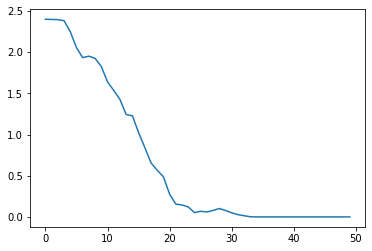

In [ ]:
plt.plot(loss_memory)

In [ ]:
outputs

tensor([[ 18.3647,  32.5342,  18.6576,  14.6650,   6.1730,  10.0657,  -7.9321,
          -9.8348, -15.6333, -29.5759, -45.9216],
        [ 46.2482,  37.2458,  24.7382,  17.4520,   4.5457,   3.9529, -12.4012,
         -21.0148, -23.8433, -31.6828, -56.0276],
        [ 21.1096,  42.6348,  21.9822,  24.5872,  15.3298,   7.8916,  -5.8444,
         -11.1766, -27.3290, -37.2513, -56.8495],
        [ 30.1145,  38.6328,  18.1074,  23.0918,   4.4566,   3.7088, -12.6997,
         -10.3573, -17.7596, -30.6521, -58.4827],
        [-25.0189,   4.1915,  -7.6857,   4.5803,   8.4689,  21.9333,   1.1490,
           3.1705,   6.4769,   2.6542, -17.4120],
        [-53.5473, -41.2444, -13.5653, -20.0512,  -9.5228,  13.4061,  10.0667,
          22.7038,  25.1697,  37.0740,  25.4016],
        [-23.3516, -11.1017,  -4.6775,   8.2501,  13.4638,  24.7063,   9.1335,
           9.2695,   3.6564,  -3.4303, -22.5319],
        [ -9.8980,  16.7579,  16.5725,  29.3704,  11.8058,   0.9036,   3.5392,
          -6.0669,

# Testing

In [ ]:
def main_test():
  label = []
  imageset = []
  for i in range(0,5000):
    amt, image = cleanup()
    label.append(amt)
    imageset.append(torch.from_numpy(image).float())
  return label, imageset

label_t,imageset_t = main_test()

In [ ]:
image_test = SquaresDataset(label_t,imageset_t)
testloader = DataLoader(image_test,batch_size=32,shuffle=True,num_workers=1,pin_memory=True)

In [ ]:
net.eval()
score = []
for i, data in enumerate(testloader):
  labels = data['label']
  images = data['image']
  images, labels = images.cuda(), labels.cuda()
  outputs = net(images)
  outputs_numpy = outputs.cpu().data.numpy()
  outputs_argmax = np.argmax(outputs_numpy,axis=1)
  labels_numpy = labels.cpu().data.numpy()
  score = np.concatenate((score,(labels_numpy==outputs_argmax).astype(int)),axis=0)

meanAccuracy = sum(score)/len(score)
print(meanAccuracy)

0.3444


In [ ]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_1samp(a=score, popmean=1/11)
print(t_statistic , p_value)

37.71836974076218 3.3173559573557384e-274


In [ ]:
mAccs = [meanAccuracy]
for i in range(50):
  def main_test():
    label = []
    imageset = []
    for i in range(0,5000):
      amt, image = cleanup()
      label.append(amt)
      imageset.append(torch.from_numpy(image).float())
    return label, imageset
  label_t,imageset_t = main_test()
  image_test = SquaresDataset(label_t,imageset_t)
  testloader = DataLoader(image_test,batch_size=32,shuffle=True,num_workers=1,pin_memory=True)
  net.eval()
  score = []
  for i, data in enumerate(testloader):
    labels = data['label']
    images = data['image']
    images, labels = images.cuda(), labels.cuda()
    outputs = net(images)
    outputs_numpy = outputs.cpu().data.numpy()
    outputs_argmax = np.argmax(outputs_numpy,axis=1)
    labels_numpy = labels.cpu().data.numpy()
    score = np.concatenate((score,(labels_numpy==outputs_argmax).astype(int)),axis=0)
  meanAccuracy = sum(score)/len(score)
  mAccs.append(meanAccuracy)
print(mAccs)

[0.3444, 0.333, 0.3442, 0.3342, 0.3298, 0.333, 0.3408, 0.3398, 0.335, 0.3446, 0.354, 0.346, 0.333, 0.3316, 0.336, 0.3436, 0.3334, 0.3422, 0.3546, 0.3388, 0.3472, 0.3462, 0.3472, 0.3224, 0.3406, 0.3506, 0.339, 0.3454, 0.3412, 0.3428, 0.3352, 0.3536, 0.3404, 0.3412, 0.3396, 0.3442, 0.3374, 0.3334, 0.3346, 0.3408, 0.3382, 0.3316, 0.3512, 0.3344, 0.345, 0.34, 0.3412, 0.3418, 0.3398, 0.3376, 0.3364]


In [ ]:
mAccLabel=[]
for i in range(1,52):
  mAccLabel.append(i)

<BarContainer object of 51 artists>

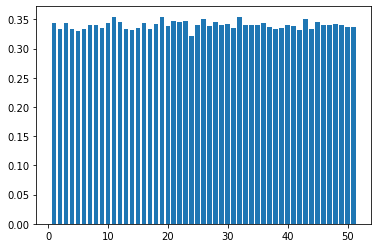

In [ ]:
plt.bar(mAccLabel,mAccs)

In [ ]:
len(mAccs)

51

In [ ]:
import statistics as st
st.stdev(mAccs)

0.006558538813832624

In [ ]:
st.mean(mAccs)

0.3402392156862745

In [ ]:
t_statistic, p_value = stats.ttest_1samp(a=mAccs, popmean=1/11)
print(t_statistic , p_value)

271.48931975831346 6.755775153378346e-81
